In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 특성 공학 (Feature Engineering)

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('./perch.csv')
perch_data = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[ 9.07538153 69.46401443 38.00385678] -599.1708082981097
0.9559326821885706
0.8796419177546367


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3, 5]])
poly.transform([[2, 3, 5]])

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [12]:
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

X_train_poly.shape, poly.get_feature_names_out()

((42, 9),
 array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
        'x2^2'], dtype=object))

In [13]:
lr_p = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

lr.coef_, lr.intercept_

0.9903183436982126
0.9714559911594125


(array([  34.80604039,  -88.68430232, -184.11606694,   -2.2696004 ,
           8.74890226,    9.41670602,   27.76120631, -119.89306061,
          93.68198334]),
 np.float64(124.06521772229536))

In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_p5 = poly.fit_transform(X_train)
X_test_p5 = poly.fit_transform(X_test)
X_train_p5.shape
# 초 과대 적합(Overfitting) -> 훈련셋에는 완벽한데, 테스트는 망한
lr.fit(X_train_p5, y_train)
lr.score(X_train_p5, y_train)
lr.score(X_test_p5, y_test)

-144.40564483377855

# 규제 (Regularization)
과대 적합 (Overfiting) 방지를 위함
- 릿지(ridge) 회귀 : 계수를 제곱한 값을 기준으로
- 라소(lasso) 회구 : 절대값 기준으로 규제

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 훈련셋으로 스케일링 학습
ss.fit(X_train_p5)
# 훈련 & 테스트 모두 훈련셋 기준으로 스케일링 진행
X_train_scaled = ss.transform(X_train_p5)
X_test_scaled = ss.transform(X_test_p5)


In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.988728468997471
0.9725329582461569


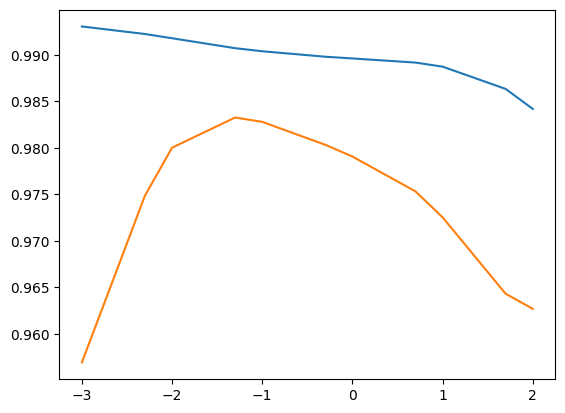

In [22]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    s1 = ridge.score(X_train_scaled, y_train)
    s2 = ridge.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [23]:
# alpha = 0.1
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)
s1 = ridge.score(X_train_scaled, y_train)
s2 = ridge.score(X_test_scaled, y_test)
print(s1, s2)

0.9907126320312711 0.9832630119139567


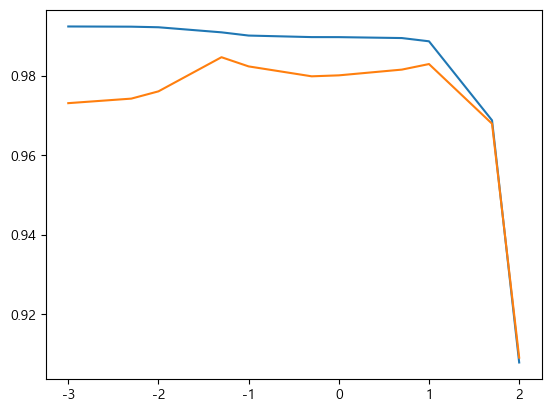

In [26]:
from sklearn.linear_model import Lasso

train_score = []
test_score = []

alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    s1 = lasso.score(X_train_scaled, y_train)
    s2 = lasso.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [27]:
lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

s1 = lasso.score(X_train_scaled, y_train)
s2 = lasso.score(X_test_scaled, y_test)
print(s1, s2)

X = poly.transform([[13.7, 3.53, 2]])
X = ss.transform(X)
lasso.predict(X)

0.9887624603020236 0.9830309645308443


array([31.53335736])